# Demo notebook for MapGlue on a single pair of images

In [2]:
import cv2
import torch
import matplotlib.pyplot as plt
import visualize
# Load the TorchScript model
model = torch.jit.load('./weights/fastmapglue_model.pt')
model.eval()
print("Model loaded successfully!")

Model loaded successfully!


## map-visible image pair matching

In [15]:
# Load example images
image0 = cv2.imread('./assets/map-visible/L2.png')
image1 = cv2.imread('./assets/map-visible/R2.png')

# Convert BGR to RGB
image0 = cv2.cvtColor(image0, cv2.COLOR_BGR2RGB)
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

# Convert numpy arrays to torch.Tensor
image0 = torch.from_numpy(image0)
image1 = torch.from_numpy(image1)
num_keypoints = torch.tensor(2048) # Defaults to 2048

# Run inference
points_tensor = model(image0, image1, num_keypoints)
points0 = points_tensor[:, :2]
points1 = points_tensor[:, 2:]

In [16]:
# Mask outliers using RANSAC (Homography or Fundamental Matrix)
inlier_method = 'H' # F: Fundamental Matrix, H: Homography 
if inlier_method == 'F':
    F, inlier_mask = cv2.findFundamentalMat(points0.cpu().numpy(), points1.cpu().numpy(), cv2.USAC_MAGSAC, ransacReprojThreshold=1, maxIters=10000, confidence=0.9999)
elif inlier_method == 'H':
    H_pred, inlier_mask = cv2.findHomography(points0.cpu().numpy(), points1.cpu().numpy(), cv2.USAC_MAGSAC, ransacReprojThreshold=3, maxIters=10000, confidence=0.9999)

inlier_mask = inlier_mask.ravel() > 0
mkpts0 = points0[inlier_mask]
mkpts1 = points1[inlier_mask]

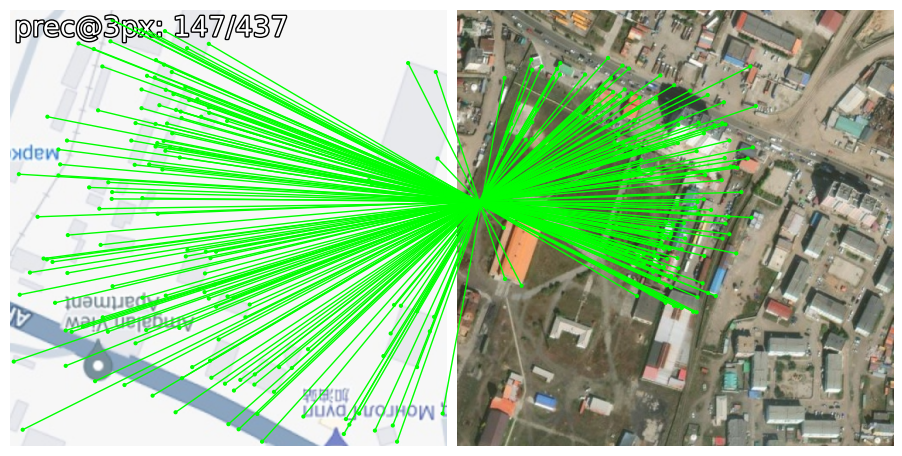

In [18]:
# visualize
axes = visualize.show_images([image0.cpu().numpy(), image1.cpu().numpy()])
visualize.draw_matches(mkpts0, mkpts1, line_colors="lime", line_width=1)
visualize.add_text(0, f'prec@3px: {len(mkpts1)}/{len(points0)}', font_size=20)
plt.show()



## sar-visible image pair matching

In [20]:
# Load example images
image0 = cv2.imread('./assets/sar-visible/L2.jpg')
image1 = cv2.imread('./assets/sar-visible/R2.jpg')

# Convert BGR to RGB
image0 = cv2.cvtColor(image0, cv2.COLOR_BGR2RGB)
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

# Convert numpy arrays to torch.Tensor
image0 = torch.from_numpy(image0)
image1 = torch.from_numpy(image1)
num_keypoints = torch.tensor(2048) # Defaults to 2048

# Run inference
points_tensor = model(image0, image1, num_keypoints)
points0 = points_tensor[:, :2]
points1 = points_tensor[:, 2:]

In [21]:
# Mask outliers using RANSAC (Homography or Fundamental Matrix)
inlier_method = 'H' # F: Fundamental Matrix, H: Homography 
if inlier_method == 'F':
    F, inlier_mask = cv2.findFundamentalMat(points0.cpu().numpy(), points1.cpu().numpy(), cv2.USAC_MAGSAC, ransacReprojThreshold=1, maxIters=10000, confidence=0.9999)
elif inlier_method == 'H':
    H_pred, inlier_mask = cv2.findHomography(points0.cpu().numpy(), points1.cpu().numpy(), cv2.USAC_MAGSAC, ransacReprojThreshold=3, maxIters=10000, confidence=0.9999)

inlier_mask = inlier_mask.ravel() > 0
mkpts0 = points0[inlier_mask]
mkpts1 = points1[inlier_mask]

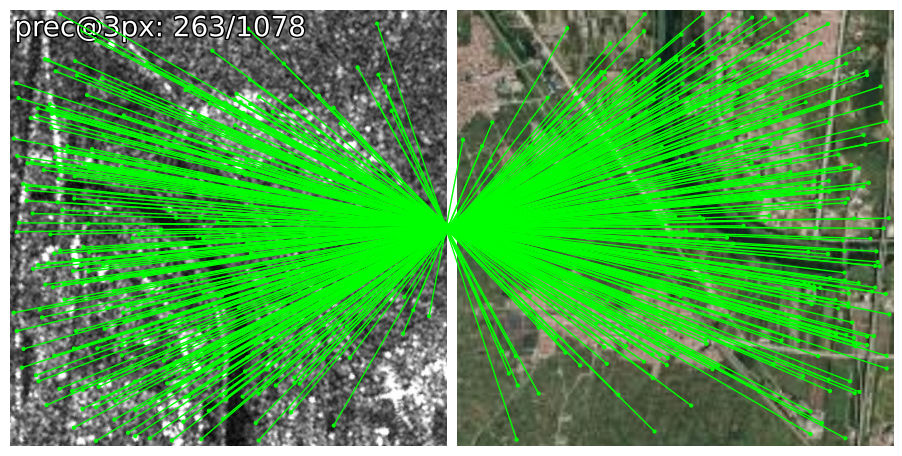

In [22]:
# visualize
axes = visualize.show_images([image0.cpu().numpy(), image1.cpu().numpy()])
visualize.draw_matches(mkpts0, mkpts1, line_colors="lime", line_width=1)
visualize.add_text(0, f'prec@3px: {len(mkpts1)}/{len(points0)}', font_size=20)
plt.show()

